# KNN: 
- K-Nearest Neighbors
- Supervised modeling
- Capable of both classification and regression
- Assumption: similar things exist near each other
- For data with similar input variables, we should expect similar output variables between nearby data points

Resource used:<br>
https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [1]:
import pyreadr # import R data
import numpy as np # linear alegbra
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pyreadr.read_r("C:/Users/chely/Documents/Fall 2/Data Mining/Data/PenDigits.RData")

x_train = data['train'].iloc[:,0:16]
y_train = data['train'].iloc[:,16]

x_test = data['test'].iloc[:,0:16]
y_test = data['test'].iloc[:,16]

In [3]:
# initialize knn class with k=5 to start
classifier = KNeighborsClassifier(n_neighbors=5)
# fit KNN to training data
classifier.fit(x_train, y_train)

# make predictions on our test data
y_pred = classifier.predict(x_test)

In [4]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[354   0   0   0   0   0   7   0   2   0]
 [  0 347  15   0   1   0   0   1   0   0]
 [  0   2 362   0   0   0   0   0   0   0]
 [  0   1   0 333   0   0   0   0   0   2]
 [  0   0   0   0 354   9   1   0   0   0]
 [  0   0   0   6   0 328   0   0   0   1]
 [  0   0   0   0   0   0 336   0   0   0]
 [  0  15   1   0   0   0   0 347   1   0]
 [  1   0   0   0   0   1   0   0 334   0]
 [  0   2   0   9   0   1   0   4   1 319]]


In [5]:
# More classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       363
           1       0.95      0.95      0.95       364
           2       0.96      0.99      0.98       364
           3       0.96      0.99      0.97       336
           4       1.00      0.97      0.98       364
           5       0.97      0.98      0.97       335
           6       0.98      1.00      0.99       336
           7       0.99      0.95      0.97       364
           8       0.99      0.99      0.99       336
           9       0.99      0.95      0.97       336

    accuracy                           0.98      3498
   macro avg       0.98      0.98      0.98      3498
weighted avg       0.98      0.98      0.98      3498



In [6]:
# Compute the misclassification rate (mean error rate)
print('Misclassification Rate:', np.mean(y_pred != y_test))

Misclassification Rate: 0.024013722126929673


We will plot the misclassification rate for the predicted values of test set for all the K values between 1 and 20.

Text(3.1, 0.026, '3')

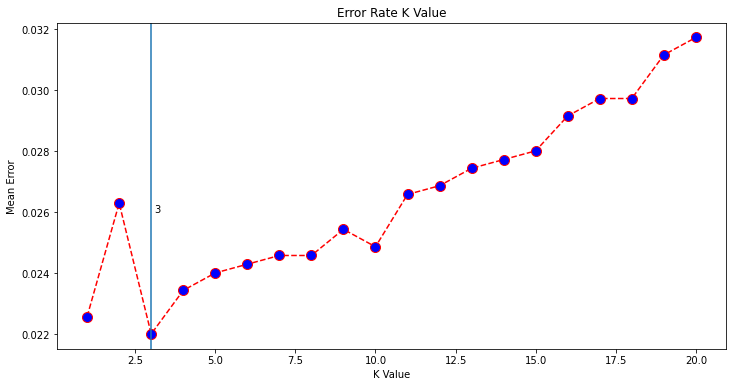

In [7]:
# k values
k_vals = range(1,21)

# empty list to store errors
error = []

# Calculating error for K values between 1 and 20
for i in k_vals:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
# Get min error
error_min = np.min(error)

# Find k that produces min error
best_k = k_vals[error.index(error_min)]

# plot the error values against K values
plt.figure(figsize=(12, 6))
plt.plot(k_vals, error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.axvline(x=best_k)
plt.text(x=best_k+0.1, y=.026, s=best_k)

In [8]:
# initialize knn class with k=5 to start
classifier = KNeighborsClassifier(n_neighbors=3)
# fit KNN to training data
classifier.fit(x_train, y_train)

# make predictions on our test data
y_pred = classifier.predict(x_test)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# More classification metrics
print(classification_report(y_test, y_pred))

# Compute the misclassification rate (mean error rate)
print('Misclassification Rate:', np.mean(y_pred != y_test))

[[354   0   0   0   0   0   5   0   3   1]
 [  0 350  11   0   1   0   0   2   0   0]
 [  0   2 362   0   0   0   0   0   0   0]
 [  0   1   0 333   0   0   0   0   0   2]
 [  0   0   0   0 354  10   0   0   0   0]
 [  0   0   0   5   0 328   0   0   0   2]
 [  0   0   0   0   0   0 336   0   0   0]
 [  0  10   1   0   0   0   1 351   1   0]
 [  1   0   0   0   0   1   0   0 334   0]
 [  0   3   0   7   1   1   0   4   1 319]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       363
           1       0.96      0.96      0.96       364
           2       0.97      0.99      0.98       364
           3       0.97      0.99      0.98       336
           4       0.99      0.97      0.98       364
           5       0.96      0.98      0.97       335
           6       0.98      1.00      0.99       336
           7       0.98      0.96      0.97       364
           8       0.99      0.99      0.99       336
           9       0.98     